In [398]:
#wow so many packages
import pandas as pd
from pandas import merge
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist 
import numpy as np      
import json
import re
import statsmodels.formula.api as smf
from nltk.util import ngrams 
from collections import Counter
import unicodedata
nltk.download('wordnet')
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
from datetime import datetime
!pip install tweepy
import os
import itertools
import collections
import tweepy as tw
import networkx
import warnings
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /Users/Eran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Eran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Eran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Eran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [399]:
#csv setup
df_posts = pd.read_csv("tweets-2022-10-21_justeattakeaway.csv")
df_posts = df_posts[df_posts["user_id"].isin([272030125, 25320756])]
df_posts = df_posts[df_posts.lang == 'en']

Question 2.1

In [400]:
#cleaning setup
additional  = ['rt','rts','retweet', 'us', 'please', 'thanks', 'thank you'] 
swords = set().union(stopwords.words('english'),additional)
df_posts.drop_duplicates(subset='text',inplace=True)
df_posts.shape
df_posts['processed_text'] = df_posts['text'].str.lower()\
    .str.replace('(@[a-z0-9]+)\w+',' ')\
    .str.replace('(http\S+)', ' ')\
    .str.replace('([^0-9a-z \t])',' ')\
    .str.replace(' +',' ')\
    .apply(lambda x: [i for i in x.split() if not i in swords])

#check
df_posts['processed_text']   

9712     [eat, q3, 2022, trading, update, company, adju...
9713     [also, offering, grocery, convenience, items, ...
9714     [officially, opened, sunderland, office, uk, l...
9715      [hi, letting, know, dm, order, number, look, rb]
9716     [delighted, sponsor, year, part, stem, program...
                               ...                        
15345    [hi, rebecca, reaching, concerned, hear, custo...
15346    [hey, james, social, team, keen, lend, hand, t...
15347    [hey, tina, much, sharing, experience, sorry, ...
15348    [hey, sammy, bringing, attention, disappointed...
15349    [hi, ellie, pleased, see, best, experience, li...
Name: processed_text, Length: 5601, dtype: object

In [401]:
#  Stemming - an algorithm to categorize similar words (or words with the same roots) into one. We can use the porter stemmer.
ps = PorterStemmer()
df_posts['stemmed'] = df_posts['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

#check
df_posts['stemmed'].head(n=10)

9712    [eat, q3, 2022, trade, updat, compani, adjust,...
9713    [also, offer, groceri, conveni, item, switzerl...
9714    [offici, open, sunderland, offic, uk, last, we...
9715         [hi, let, know, dm, order, number, look, rb]
9716    [delight, sponsor, year, part, stem, programm,...
9717    [team, acceler, growth, london, addit, capit, ...
9718    [starship, technolog, partner, bring, robot, d...
9719    [hi, david, reach, busier, usual, late, tri, b...
9720        [eat, publish, circular, egm, convoc, agenda]
9721    [belgium, partner, deliv, groceri, brussel, vi...
Name: stemmed, dtype: object

In [402]:
tweetlist_list = df_posts['stemmed'].values.tolist()
flatten = [item for sublist in tweetlist_list for item in sublist]
counts = Counter(flatten).most_common()
df = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df['Phrase']= df['Phrase'].apply(lambda x: ' '.join([w for w in x ]))

print(df)

                 Phrase  Count
0                   d m   2739
1               l o o k   1937
2             o r d e r   1891
3                   h i   1784
4               l i k e   1561
...                 ...    ...
4407          s h o n a      1
4408  s w e e t x n e r      1
4409            a j a y      1
4410          g r a t e      1
4411            c a n t      1

[4412 rows x 2 columns]


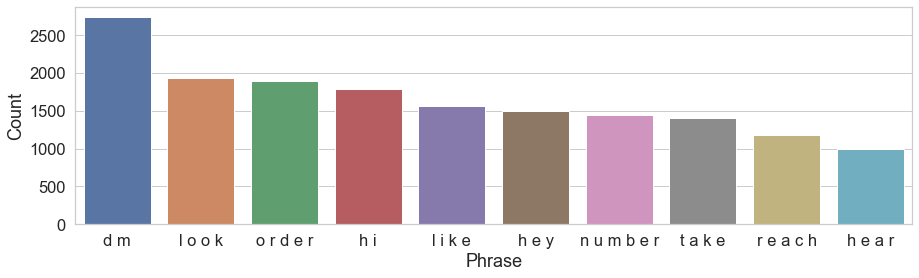

In [403]:
#plot of common words
df = df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df, x= "Phrase", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [404]:
#bigrams
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]
words = basic_clean(''.join(str(df_posts['stemmed'].tolist())))

#print
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

(order, number)     1424
(dm, order)          875
(drop, dm)           616
(closer, look)       614
(twitter, com)       608
(take, closer)       604
(email, twitter)     532
(like, take)         496
(lend, hand)         459
(send, email)        389
(look, could)        388
(pop, dm)            384
(reach, like)        367
(send, dm)           352
(sorri, hear)        345
(hi, thank)          326
(thank, reach)       309
(number, take)       285
(relev, detail)      285
(let, know)          284
(like, look)         275
(member, team)       273
(take, look)         268
(soon, possibl)      259
(get, touch)         258
(could, pop)         253
(dm, go)             250
(pick, soon)         242
(number, dm)         236
(hand, send)         234
dtype: int64

In [405]:
#trigrams
trigram = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]
print(trigram)

(dm, order, number)        866
(take, closer, look)       603
(email, twitter, com)      484
(drop, dm, order)          340
(like, take, closer)       327
(closer, look, could)      310
(send, email, twitter)     285
(order, number, take)      282
(hi, thank, reach)         248
(order, number, dm)        235
(pick, soon, possibl)      233
(pop, dm, order)           232
(lend, hand, send)         228
(look, lend, hand)         227
(com, relev, detail)       224
(thank, reach, like)       221
(member, team, pick)       219
(detail, member, team)     219
(team, pick, soon)         217
(relev, detail, member)    216
(hand, send, email)        211
(like, look, lend)         208
(reach, like, look)        208
(could, pop, dm)           201
(order, number, via)       198
(twitter, com, relev)      189
(pop, order, number)       188
(go, soon, om)             183
(number, via, dm)          177
(soon, possibl, mk)        161
dtype: int64


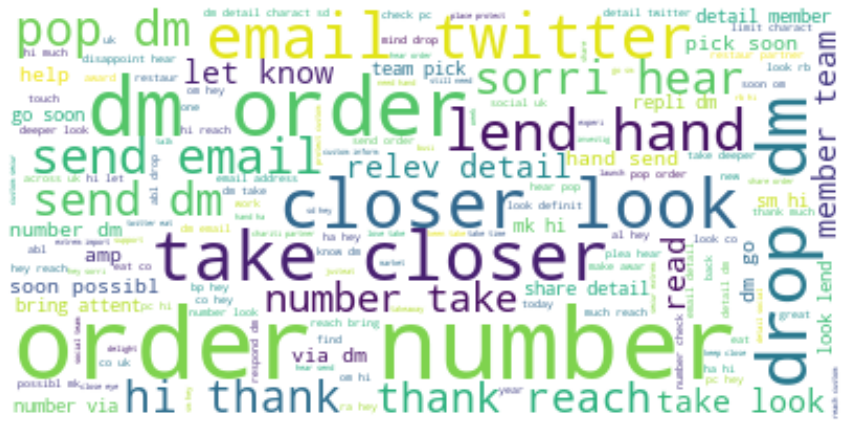

In [406]:
#wordclouds
text = " ".join(words)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [408]:
#datetime format
df_posts['date'] = df_posts['created_at'].dt.strftime('%Y/%m/%d')
df_posts['time'] = df_posts['created_at'].dt.strftime('%H:%M:%S.%f')
if df_posts['created_at'].dtypes != 'datetime64[ns]':
    df_posts['created_at']= pd.to_datetime(df_posts['created_at'])
if df_posts['date'].dtypes != 'datetime64[ns]':
    df_posts['date']= pd.to_datetime(df_posts['date'])


#check
print(df_posts['time'])
print(df_posts['date'])

9712     05:01:37.000000
9713     10:50:51.000000
9714     09:46:05.000000
9715     17:59:24.000000
9716     09:47:59.000000
              ...       
15345    14:18:19.000000
15346    14:09:05.000000
15347    14:05:31.000000
15348    13:48:50.000000
15349    13:46:20.000000
Name: time, Length: 5601, dtype: object
9712    2022-10-19
9713    2022-10-18
9714    2022-10-18
9715    2022-10-16
9716    2022-10-14
           ...    
15345   2022-08-28
15346   2022-08-28
15347   2022-08-28
15348   2022-08-28
15349   2022-08-28
Name: date, Length: 5601, dtype: datetime64[ns]


Text(0, 0.5, 'Number of tweets')

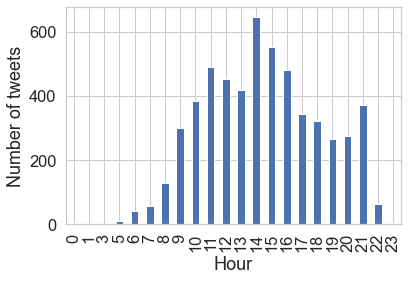

In [409]:
#Created tweets per hour
df_posts['hour'] = df_posts['created_at'].dt.hour
hour_counts = df_posts.groupby('hour')['created_at'].count() 
hour_counts.plot(kind='bar')
plt.xlabel("Hour")
plt.ylabel("Number of tweets")

Text(0, 0.5, 'Number of tweets')

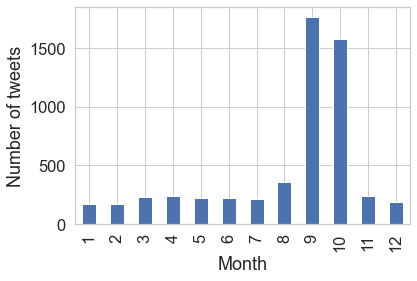

In [410]:
#Created tweets per month
df_posts['month'] = df_posts['created_at'].dt.month
tweets_by_month = df_posts.groupby('month')['created_at'].count()
tweets_by_month.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Number of tweets")

Text(0, 0.5, 'Number of tweets')

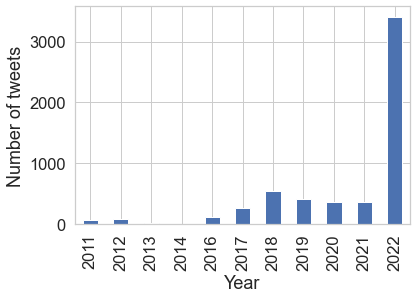

In [411]:
#Created tweets per year
df_posts['Year'] = df_posts['created_at'].dt.year
Year_counts = df_posts.groupby('Year')['created_at'].count()
Year_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of tweets")

Question 2.2

In [412]:
#sentiment scores
sia = vd.SentimentIntensityAnalyzer()
df_posts['sentiment_score'] = df_posts['processed_text'].apply(lambda x: sum([sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]))
df_posts[['processed_text','sentiment_score']].head(n=10)

,processed_text,sentiment_score
9712,"[eat, q3, 2022, trading, update, company, adju...",0.4404
9713,"[also, offering, grocery, convenience, items, ...",0.5574
9714,"[officially, opened, sunderland, office, uk, l...",0.0000
9715,"[hi, letting, know, dm, order, number, look, rb]",0.0772
9716,"[delighted, sponsor, year, part, stem, program...",1.4699
9717,"[team, accelerating, growth, london, addition,...",0.3818
9718,"[starship, technologies, partner, bring, robot...",0.0000
9719,"[hi, david, reaching, busier, usual, lately, t...",0.9164
9720,"[eat, publishes, circular, egm, convocation, a...",0.0000
9721,"[belgium, partner, deliver, groceries, brussel...",0.0000


In [413]:
#check
df_posts['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 1    2493
 0    2328
 2     599
 3      99
 4      41
-1      36
 5       3
 6       2
Name: sentiment_score, dtype: int64

In [414]:
#positive negative seperation
pos_tweet = df_posts[ df_posts['sentiment_score'] >= 3]
pos_tweet = pos_tweet['processed_text']
neg_tweet = df_posts[ df_posts['sentiment_score'] < 3]
neg_tweet = neg_tweet['processed_text']

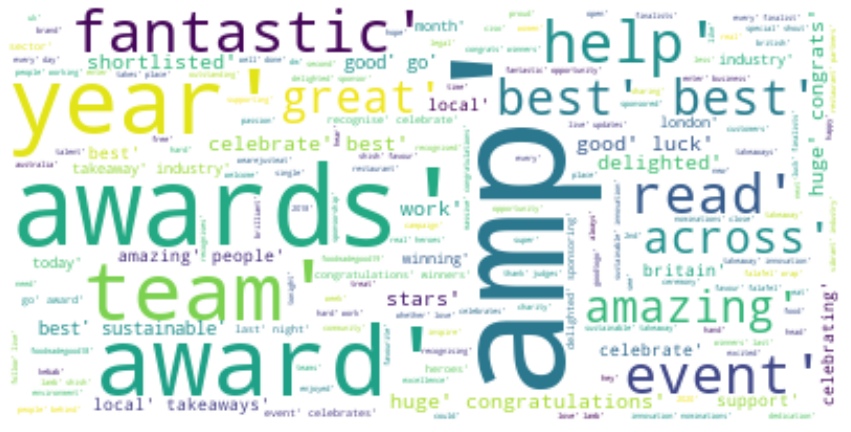

In [415]:
#wordcloud for positive
text = " ".join(pos_tweet.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


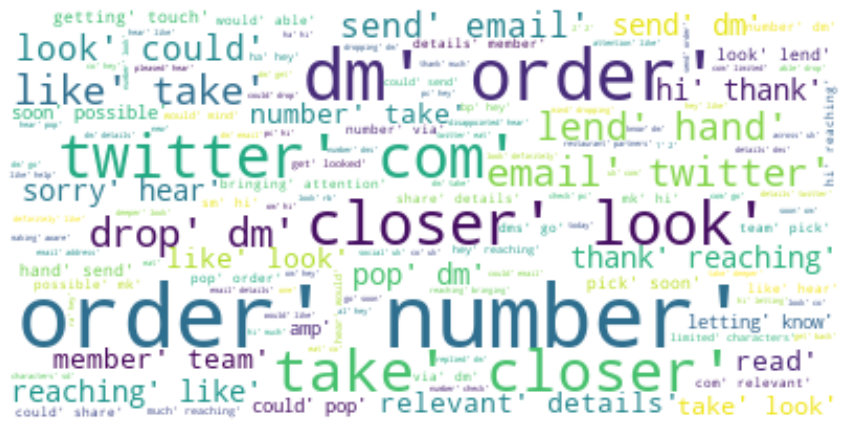

In [416]:
#wordcloud for negative
text = " ".join(neg_tweet.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Question 3.1 

In [417]:
formula = "like_count ~ sentiment_score + retweet_count + reply_count"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept         -0.045449
sentiment_score    2.103386
retweet_count      0.011236
reply_count        4.151859
dtype: float64


In [418]:
formula = "retweet_count ~ sentiment_score + reply_count + like_count"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept          1.692496
sentiment_score   -0.385543
reply_count       -0.471986
like_count         0.295220
dtype: float64


In [419]:
formula = "reply_count ~ sentiment_score + retweet_count + like_count"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept          0.255879
sentiment_score   -0.091966
retweet_count     -0.000216
like_count         0.049833
dtype: float64


In [420]:
formula = "like_count ~ sentiment_score"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept          1.307345
sentiment_score    2.173911
dtype: float64


In [421]:
formula = "retweet_count ~ sentiment_score"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept          1.927125
sentiment_score    0.248538
dtype: float64


In [422]:
formula = "reply_count ~ sentiment_score"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept          0.320613
sentiment_score    0.016314
dtype: float64


Question 3.2

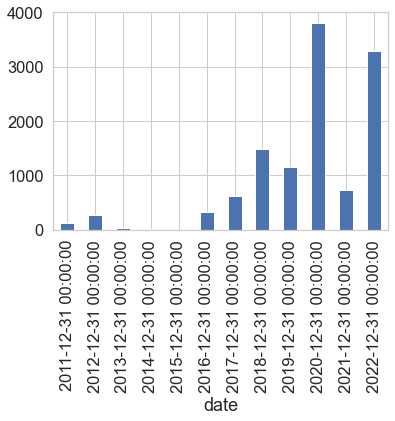

In [423]:
#convert datetime format
df_posts['date'] = pd.to_datetime(df_posts['date'])

#year graph of retweets
df_retweet_Year = df_posts.groupby([pd.Grouper(key='date', freq='Y')])['retweet_count'].sum()
df_retweet_Year.plot(kind='bar')
plt.show()

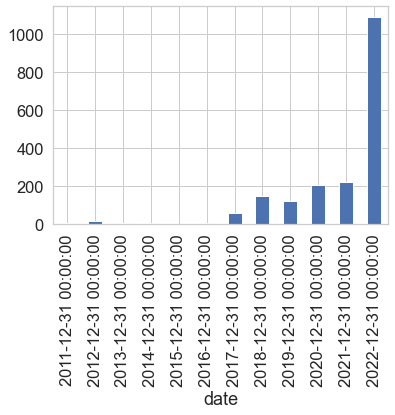

In [424]:
#year graph of replies
df_reply_Year = df_posts.groupby([pd.Grouper(key='date', freq='Y')])['reply_count'].sum()
df_reply_Year.plot(kind='bar')
plt.show()

In [425]:
#sentiment score column creation
conditions = [(df_posts['sentiment_score'] < 0), 
              (df_posts['sentiment_score'] >= 0) & (df_posts['sentiment_score'] <= 1),
             (df_posts['sentiment_score'] > 1)]
values = ['negative','neutral', 'positive']
df_posts['sentiment'] = np.select(conditions, values)

In [426]:
df_grouped_year = df_posts.groupby(['sentiment','Year'])['sentiment']
df_count_year = df_grouped_year.count()
df_count_year

sentiment  Year
negative   2011       1
           2012       7
           2013       1
           2014       1
           2016       1
           2017      20
           2018      23
           2019      20
           2020      21
           2021      32
           2022     171
neutral    2011      46
           2012      72
           2013      10
           2014       2
           2016      99
           2017     185
           2018     267
           2019     155
           2020     190
           2021     238
           2022    2263
positive   2011       9
           2012       3
           2013       4
           2016      11
           2017      53
           2018     252
           2019     239
           2020     142
           2021      87
           2022     976
Name: sentiment, dtype: int64

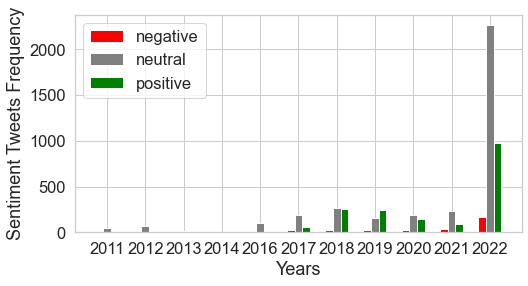

In [427]:
x = np.arange(11)
negative = list(df_count_year["negative"])
neutral = list(df_count_year["neutral"])
positive = list(df_count_year["positive"])
positive.insert(3,0)
width = 0.2

plt.figure(figsize=(8,4))

plt.bar(x-0.2, negative, width, color='red')
plt.bar(x, neutral, width, color='grey')
plt.bar(x+0.2, positive, width, color='green')

plt.xticks(x, ['2011','2012','2013','2014','2016','2017','2018','2019','2020','2021','2022'])
plt.xlabel("Years")
plt.ylabel("Sentiment Tweets Frequency")
plt.legend(["negative", "neutral", "positive"])
plt.show()

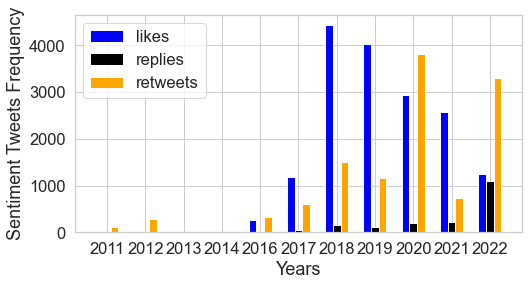

In [428]:
x = np.arange(11)
likes = list(df_likes_Year)
replies = list(df_reply_Year)
retweets=list(df_retweet_Year)
likes.pop(4)
replies.pop(4)
retweets.pop(4)
width = 0.2
plt.figure(figsize=(8,4))
plt.bar(x-0.2, likes, width, color='blue')
plt.bar(x, replies, width, color='black')
plt.bar(x+0.2, retweets, width, color='orange')

plt.xticks(x, ['2011','2012','2013','2014','2016','2017','2018','2019','2020','2021','2022'])
plt.xlabel("Years")
plt.ylabel("Sentiment Tweets Frequency")
plt.legend(["likes","replies","retweets"])
plt.show()

Question 3.3 

In [429]:
df_churn = pd.read_csv("Daily_Churned_customers_JET.csv")

In [430]:
df_churn['date'] = pd.to_datetime(df_churn['Day']).dt.strftime('%Y/%m/%d')
if df_churn['date'].dtypes != 'datetime64[ns]':
    df_churn['date']= pd.to_datetime(df_churn['date'])
if df_churn['Day'].dtypes != 'datetime64[ns]':
    df_churn['Day']= pd.to_datetime(df_churn['Day'])

In [431]:
merged_df = merge(df_posts, df_churn, how="outer",on="date")

In [432]:
#change the name of the ugly column
merged_df["Churned"]=merged_df["Churned customers"]
del merged_df["Churned customers"]

In [433]:
#delete NaN values
merged_df = merged_df[merged_df['tweet_id'].notna()]

In [434]:
#check
merged_df

,tweet_id,user_id,text,conversation_id,created_at,fetched_at,in_reply_to_user_id,lang,geo,possibly_sensitive,...,stemmed,date,time,hour,month,Year,sentiment_score,sentiment,Day,Churned
0,1.582598e+18,272030125.0,Just Eat https://t.co/IrEjQcLQK3 Q3 2022 Tradi...,1.582598e+18,2022-10-19 05:01:37+00:00,2022-10-21T11:14:44.000Z,NaN,en,NaN,False,...,"[eat, q3, 2022, trade, updat, compani, adjust,...",2022-10-19,05:01:37.000000,5.0,10.0,2022.0,0.4404,neutral,2022-10-19,8805626.0
1,1.582845e+18,25320756.0,"@Y2thej66 Hi there, Michael, that's certainly ...",1.582829e+18,2022-10-19 21:21:53+00:00,2022-10-21T11:15:01.000Z,8.173774e+17,en,NaN,False,...,"[hi, michael, certainli, great, hear, send, qu...",2022-10-19,21:21:53.000000,21.0,10.0,2022.0,1.2444,positive,2022-10-19,8805626.0
2,1.582844e+18,25320756.0,@jessica_oqvist Hey there👋! Thanks for bringin...,1.582814e+18,2022-10-19 21:21:15+00:00,2022-10-21T11:15:01.000Z,1.516129e+18,en,NaN,False,...,"[hey, bring, attent, abl, get, back, dm, sd]",2022-10-19,21:21:15.000000,21.0,10.0,2022.0,0.0000,neutral,2022-10-19,8805626.0
3,1.582844e+18,25320756.0,@_G12 We hold ourselves to high standards and ...,1.582813e+18,2022-10-19 21:19:55+00:00,2022-10-21T11:15:01.000Z,8.483082e+07,en,NaN,False,...,"[g12, hold, high, standard, line, would, expec...",2022-10-19,21:19:55.000000,21.0,10.0,2022.0,0.6979,neutral,2022-10-19,8805626.0
4,1.582844e+18,25320756.0,"@_G12 Hi, thanks for reaching out. Most delive...",1.582813e+18,2022-10-19 21:19:46+00:00,2022-10-21T11:15:01.000Z,8.483082e+07,en,NaN,False,...,"[g12, hi, reach, deliveri, driver, deliv, food...",2022-10-19,21:19:46.000000,21.0,10.0,2022.0,0.8774,neutral,2022-10-19,8805626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,1.563894e+18,25320756.0,"@BeccaTurnbull13 Hi Rebecca, thanks for reachi...",1.563519e+18,2022-08-28 14:18:19+00:00,2022-10-21T11:15:18.000Z,1.470773e+18,en,NaN,False,...,"[hi, rebecca, reach, concern, hear, custom, di...",2022-08-28,14:18:19.000000,14.0,8.0,2022.0,1.1677,positive,2022-08-28,8541595.0
5597,1.563891e+18,25320756.0,@BickerdykeJames Hey there James! Our social t...,1.563885e+18,2022-08-28 14:09:05+00:00,2022-10-21T11:15:18.000Z,1.498603e+18,en,NaN,False,...,"[hey, jame, social, team, keen, lend, hand, to...",2022-08-28,14:09:05.000000,14.0,8.0,2022.0,1.1586,positive,2022-08-28,8541595.0
5598,1.563891e+18,25320756.0,"@tina12580 Hey Tina, thanks so much for sharin...",1.526820e+18,2022-08-28 14:05:31+00:00,2022-10-21T11:15:18.000Z,3.672719e+07,en,NaN,False,...,"[hey, tina, much, share, experi, sorri, hear, ...",2022-08-28,14:05:31.000000,14.0,8.0,2022.0,0.3443,neutral,2022-08-28,8541595.0
5599,1.563886e+18,25320756.0,"@sammyinside Hey Sammy, thanks for bringing th...",1.563882e+18,2022-08-28 13:48:50+00:00,2022-10-21T11:15:18.000Z,2.990449e+09,en,NaN,False,...,"[hey, sammi, bring, attent, disappoint, see, e...",2022-08-28,13:48:50.000000,13.0,8.0,2022.0,-0.0383,negative,2022-08-28,8541595.0


<AxesSubplot:>

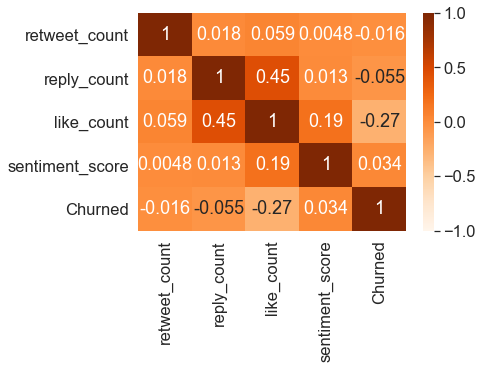

In [435]:
#creating the heatmap
merged_heatmap = merged_df[['retweet_count', 'reply_count','like_count','sentiment_score','Churned']].copy()
sns.heatmap(merged_heatmap.corr(),vmin=-1,vmax=1,cmap="Oranges", annot = True)

<AxesSubplot:>

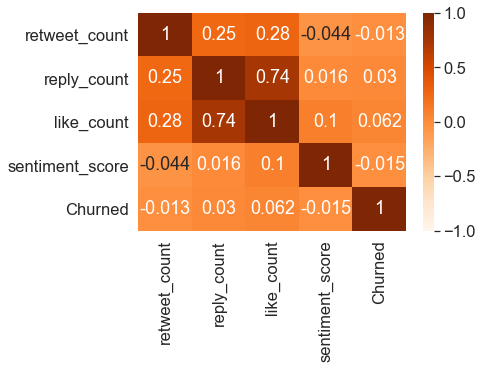

In [436]:
#creating the heatmap for only 2021
merged_heatmap = merged_df[['retweet_count', 'reply_count','like_count','sentiment_score','Churned',"Year"]].copy()
merged_heatmap = merged_heatmap[merged_heatmap["Year"]==2021]
merged_heatmap = merged_heatmap[['retweet_count', 'reply_count','like_count','sentiment_score','Churned']].copy()
sns.heatmap(merged_heatmap.corr(),vmin=-1,vmax=1,cmap="Oranges", annot = True)

<AxesSubplot:>

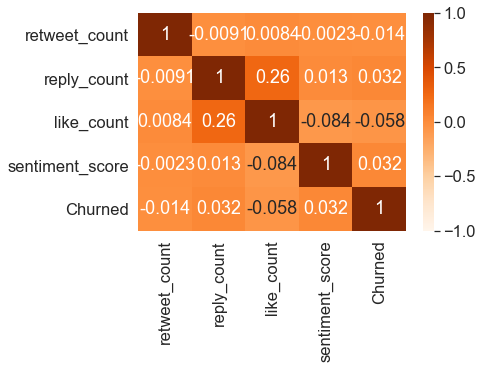

In [437]:
#creating the heatmap for only 2022
merged_heatmap = merged_df[['retweet_count', 'reply_count','like_count','sentiment_score','Churned',"Year"]].copy()
merged_heatmap = merged_heatmap[merged_heatmap["Year"]==2022]
merged_heatmap = merged_heatmap[['retweet_count', 'reply_count','like_count','sentiment_score','Churned']].copy()
sns.heatmap(merged_heatmap.corr(),vmin=-1,vmax=1,cmap="Oranges", annot = True)

4 


In [438]:
df_posts['Sustainability'] = np.where(df_posts['text'].str.contains('eco|bio|sustainable|sustain|recycle|reus|carbon|waste|green|compostable|emission|global warming|climate'),1,0)
sustainable_tweets= df_posts[df_posts['Sustainability']==1]

4.2 - 4.3

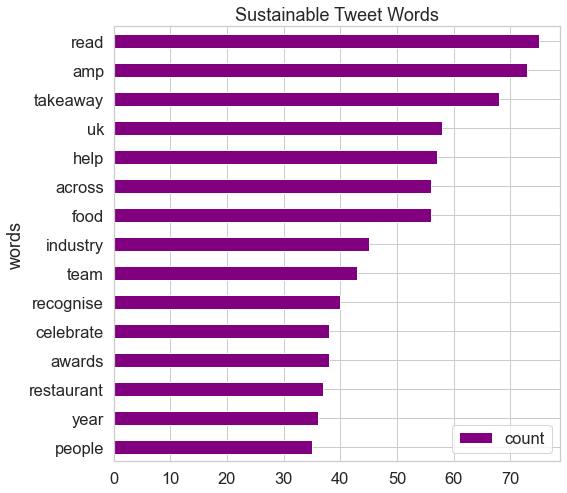

In [439]:
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
textb = sustainable_tweets['processed_text'].values.tolist()
all_words_no_urls = list(itertools.chain(*textb))
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])
clean_tweets_no_urls.head()
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Sustainable Tweet Words")
plt.show()

In [440]:
formula = "sentiment_score ~ Sustainability"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept         0.737135
Sustainability    0.613035
dtype: float64


In [441]:
sustainable_tweets["sentiment_score"].describe()

count    289.000000
mean       1.350171
std        1.234052
min       -0.932100
25%        0.401900
50%        1.048600
75%        2.009600
max        6.007200
Name: sentiment_score, dtype: float64

In [442]:
formula = "like_count ~ Sustainability"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept         2.670745
Sustainability    5.965933
dtype: float64


In [443]:
formula = "reply_count ~ Sustainability"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept         0.336032
Sustainability   -0.055755
dtype: float64


In [444]:
formula = "retweet_count ~ Sustainability"
model = smf.ols(formula, data=df_posts)
results = model.fit()

print(results.params)

Intercept         2.089608
Sustainability    0.553990
dtype: float64


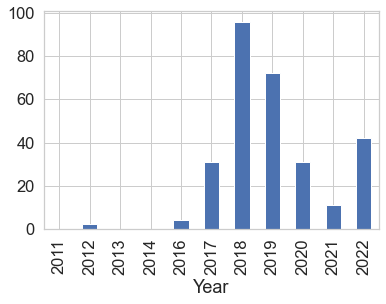

In [445]:
df_posts['Sustainability'] = np.where(df_posts['text'].str.contains('eco|bio|sustainable|sustain|recycle|reus|carbon|waste|green|compostable|emission|global warming|climate'),1,0)
sus_counts = df_posts.groupby(['Year'])['Sustainability'].sum()
sus_counts.plot(kind='bar')
plt.show()

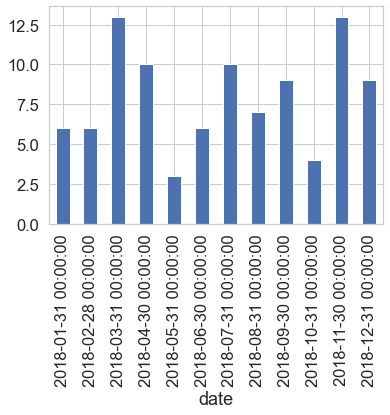

In [446]:
df_by_month = df_posts[df_posts['date'].between('2018-01-01', '2018-12-30')]
df_by_month = df_by_month.groupby([pd.Grouper(key='date', freq='M')])['Sustainability'].sum()

df_by_month.plot(kind='bar')
plt.show()

Question 4.4

In [447]:
df_all = pd.read_csv('tweets-2022-10-21_justeattakeaway.csv')
df_all = df_all[df_all.lang == 'en']

In [448]:
if df_all['created_at'].dtypes != 'datetime64[ns]':
    df_all['created_at']= pd.to_datetime(df_all['created_at'])
    
print(df_comp['created_at'].dtypes)
df_all['date'] = df_all['created_at'].dt.strftime('%Y/%m/%d')
df_all['year'] = df_all['created_at'].dt.strftime('%Y')
df_all['time'] = df_all['created_at'].dt.strftime('%H:%M:%S.%f')

datetime64[ns, UTC]


In [449]:
#company IDs added to group
conditions = [(df_all['user_id'] == 884794020),
              (df_all['user_id'] == 272030125),
              (df_all['user_id'] == 25320756),
              (df_all['user_id'] == 3100005042),
              (df_all['user_id'] == 1123948811691470849),
              (df_all['user_id'] == 21427907)] 
values = ['Deliveroo','JET', 'JET','UberEats','UberEats',"JET"]
df_all['Company'] = np.select(conditions, values)

In [450]:
df_all['Sustainability'] = np.where(df_all['text'].str.contains('eco|bio|sustainable|sustain|recycle|reus|carbon|waste|green|compostable|emission|global warming|climate'),1,0)
#check
df_all[['Sustainability']].describe()

,Sustainability
count,14786.000000
mean,0.026173
std,0.159656
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [451]:
#get numbers
df_all.groupby(['Company','year' ,'Sustainability'])['created_at'].count()

Company    year  Sustainability
Deliveroo  2022  0                 2760
                 1                   31
JET        2011  0                   56
           2012  0                   80
                 1                    2
           2013  0                   15
           2014  0                    3
           2016  0                  107
                 1                    4
           2017  0                  227
                 1                   31
           2018  0                  447
                 1                   96
           2019  0                  342
                 1                   72
           2020  0                  323
                 1                   31
           2021  0                  449
                 1                   11
           2022  0                 3464
                 1                   48
UberEats   2020  0                  422
                 1                    2
           2021  0                 3244
        

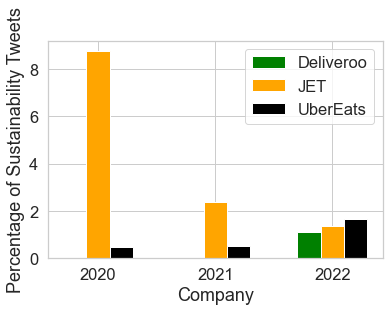

In [452]:
x = np.arange(3)
Deliveroo = [0,0,((31/2791)*100)]
UberEats = [((2/424)*100),((17/3261)*100),((42/2502)*100)]
JET = [((31/354)*100),((11/460)*100), ((48/3512)*100)]
width = 0.2

plt.bar(x-0.2, Deliveroo, width, color='green')
plt.bar(x, JET, width, color='orange')
plt.bar(x+0.2, UberEats, width, color='black')
plt.xticks(x, ['2020', '2021','2022'])
plt.xlabel("Company")
plt.ylabel("Percentage of Sustainability Tweets")
plt.legend(["Deliveroo", "JET", "UberEats"])
plt.show()

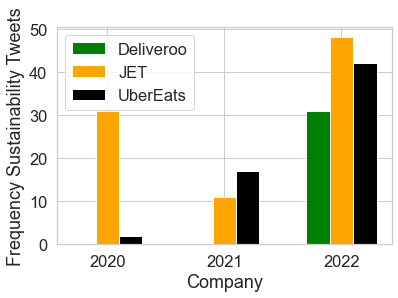

In [453]:
x = np.arange(3)
Deliveroo = [0,0,31]
UberEats = [2,17,42]
JET = [31,11,48]
width = 0.2

plt.bar(x-0.2, Deliveroo, width, color='green')
plt.bar(x, JET, width, color='orange')
plt.bar(x+0.2, UberEats, width, color='black')
plt.xticks(x, ['2020', '2021','2022'])
plt.xlabel("Company")
plt.ylabel("Frequency Sustainability Tweets")
plt.legend(["Deliveroo", "JET", "UberEats"])
plt.show()